In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import json
import pandas as pd
from game.analytics import plot_loss, plot_reward, plot_timers, plot_total_steps

### Plot how a single run went

In [63]:
log_file = "model_checkpoints/2023_03_02_23_56.json"

In [64]:
with open(log_file, 'r') as f:
    log = json.load(f)
log["rewards"] = [int(i) for i in log["rewards"]]
log.keys()

dict_keys(['params', 'rewards', 'losses', 'timers', 'episodes_total_steps', 'target_reset_episodes'])

In [66]:
# plot_timers(log['timers'])

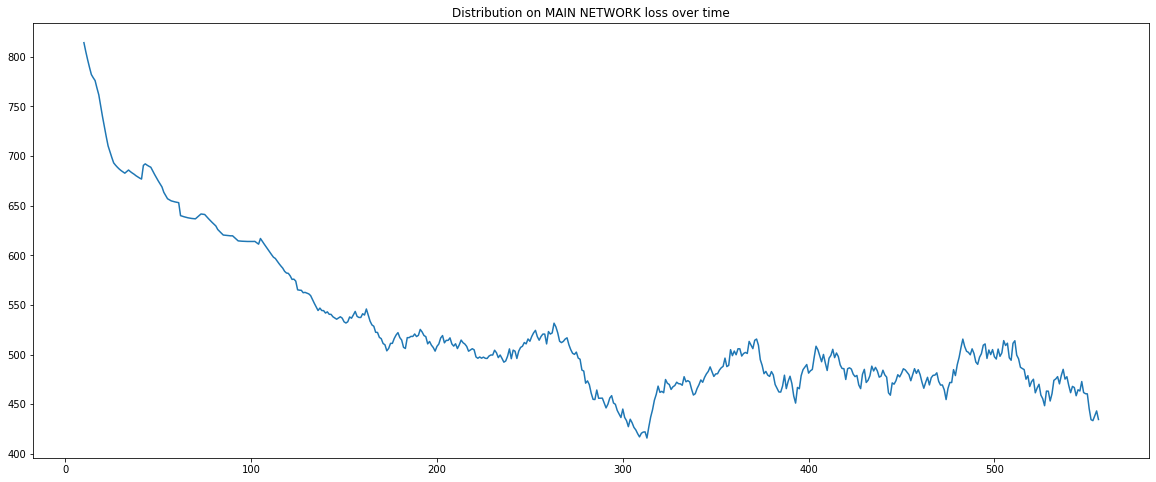

In [67]:
plot_loss(log["losses"])

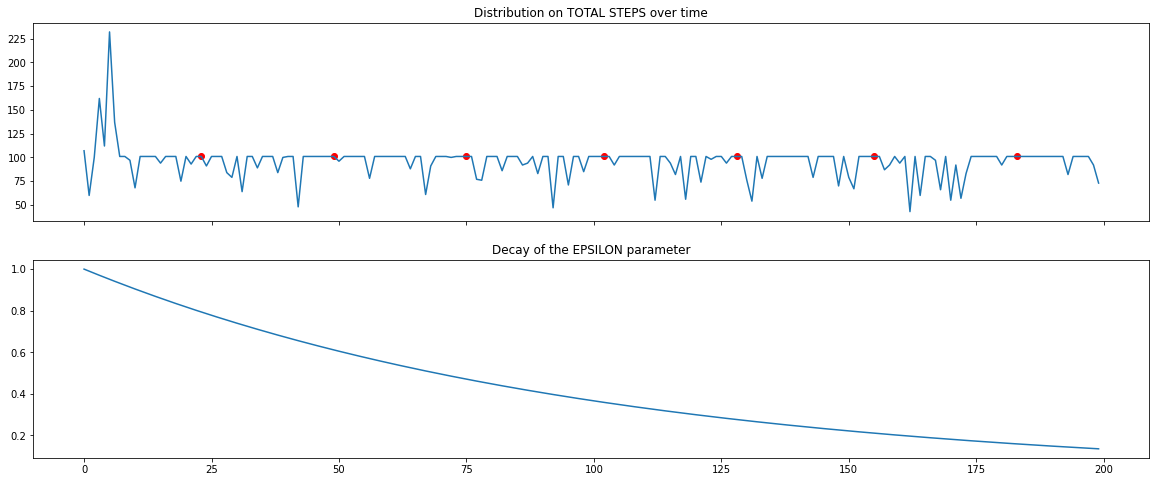

In [68]:
epsilon, decay_factor = (log["params"]["epsilon"], log["params"]["decay_factor"])
plot_total_steps(log["episodes_total_steps"], epsilon, decay_factor, log["target_reset_episodes"], window=1)

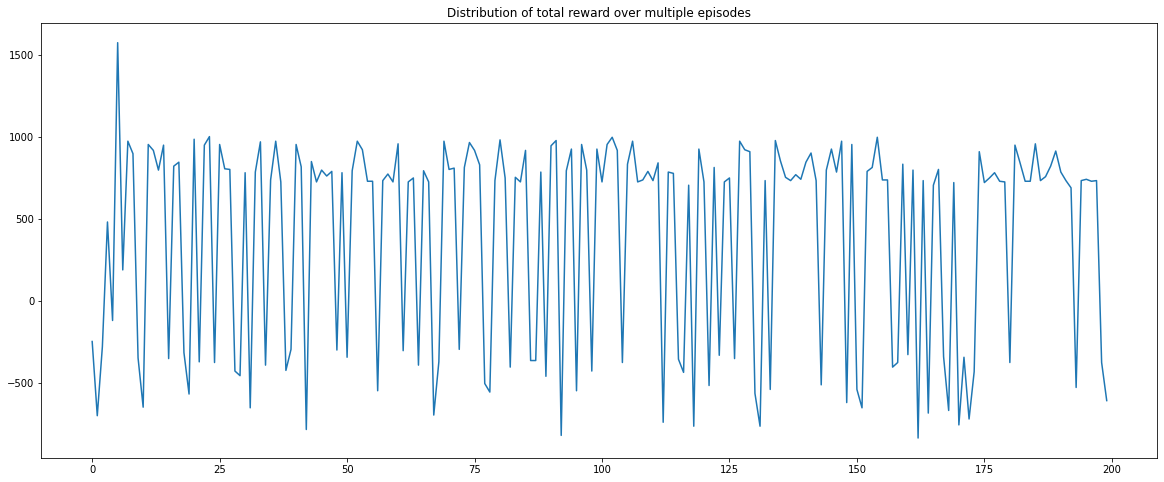

In [69]:
plot_reward(log["rewards"], window=1)

In [62]:
log["params"]

{'update_target_network_every': 500,
 'update_main_network_every': 32,
 'epsilon': 1.0,
 'decay_factor': 0.01,
 'episodes': 200,
 'max_moves_per_episode': 100,
 'hidden_size': 32,
 'conv': False,
 'random_seed': 0,
 'mini_batch_size': 32,
 'epochs': 4,
 'learning_rate': 0.7,
 'discount_factor': 0.618,
 'min_replay_size': 1000,
 'n_samples_to_train_on': 5000,
 'log_training_events': False,
 'store_run_at': 'model_checkpoints',
 'no_store': False,
 'cuda': False}

### How to decay a number over time

In [ ]:
start = 0.9
# decay_factor = 0.5
period = 200

for decay_factor in [1, 0.8, 0.5, 0.1, 0.05]:
    y = []
    x = []
    for i in range(period):
        x.append(i)
        y.append(start/(1 + decay_factor*i))

    plt.plot(x, y, label=decay_factor)

plt.legend()
plt.title("Decay shapes starting from 0.9 and decaying over 200 steps")
plt.show()